In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from icecream import ic
from tqdm.autonotebook import tqdm
%matplotlib inline

path = '../obsidian/kjm2601-materiale/media/'

In [39]:

def integrate_leapfrog(pos0, vel0, mass, charge, dt, t_final):
    def coulomb_force(pos, charge):
        N = len(pos)
        dim = len(pos[0])
        force = np.zeros((N, dim))
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                r = pos[i] - pos[j]
                r_norm = np.linalg.norm(r)
                force[i] += charge[i] * charge[j] / r_norm**3 * r
        return force

    t_range = np.arange(0, t_final, dt)

    N = len(pos0)
    dim = len(pos0[0])
    pos_t = np.zeros((len(t_range)+1, N, dim))
    vel_t = np.zeros((len(t_range)+1, N, dim))
    pos_t[0] = pos0
    vel_t[0] = vel0

    # define local variables
    pos = pos0.copy()
    vel = vel0.copy()
    
    for k, t in enumerate(t_range):
        # Make a leapfrog step
        if k == 0:
            force = coulomb_force(pos, charge)
        vel += np.diag(1/mass) @ force * dt/2
        pos += vel * dt
        force = coulomb_force(pos, charge)
        vel += np.diag(1/mass) @ force * dt/2

        t += dt
        pos_t[k+1] = pos
        vel_t[k+1] = vel
    return pos_t, vel_t





In [40]:
# Make animation


def animate(pos_t, mass, charge, dt, t_final, outfile=None, title=None):
    fig, ax = plt.subplots(figsize=(6,6))
    plt.axis('equal')
    
    t_range = np.arange(0, t_final+dt, dt)

    progress = tqdm(total=len(pos_t))
    
    def frame_update(k):
        plt.clf()
        for i in range(N):
            if charge[i] < 0:
                label = 'electron'
                color = 'red'
            else:
                label = 'nucleus'
                color = 'blue'
            plt.plot(pos_t[k,i,0], pos_t[k,i,1], 'o', label=label, color=color)
                
            k0 = max(0, k-50)
            trail = pos_t[k0:k,i]
            plt.plot(trail[:,0], trail[:,1], color=color)
            
            k0 = max(0, k-250)
            trail = pos_t[k0:k,i]
            plt.plot(trail[:,0], trail[:,1], color=color, alpha=0.5)

            k0 = max(0, k-500)
            trail = pos_t[k0:k,i]
            plt.plot(trail[:,0], trail[:,1], color=color, alpha=0.2)            
            
        progress.update(1)
            
        plt.axis('equal')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.text(x=-1.8, y=1.8, s=f'$t={t_range[k]:.2f}$')
        plt.title(title)
        
        
    ani = animation.FuncAnimation(fig, frame_update, frames=range(len(pos_t)), interval=10, repeat=False)
    ani.save(outfile, writer='ffmpeg', fps=30)
    
    #plt.show()
    return ani
    


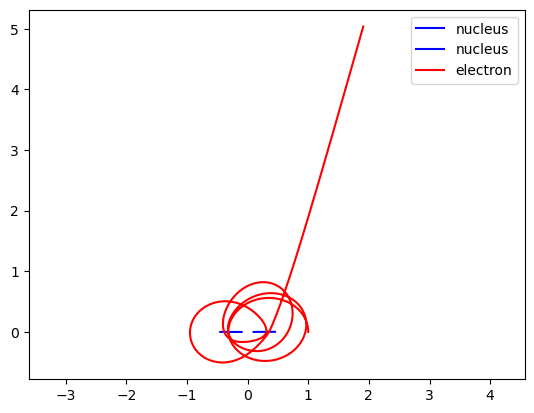

In [41]:
N = 3
dim = 2
mass = np.array([1836, 1836, 1])
charge = np.array([1, 1, -1])
pos = np.array([[.1, 0], [-.1, 0], [1.0, 0.0]])
vel = np.array([[0, 0], [0,0], [0.0, 1.0]])
dt = 0.01
t_final = 10

pos_t, vel_t = integrate_leapfrog(pos, vel, mass, charge, dt, t_final)


def quick_plot(pos_t, mass):
    plt.figure()
    for i in range(N):
        if mass[i] == 1:
            label = 'electron'
            color = 'red'
        else:
            label = 'nucleus'
            color = 'blue'
        plt.plot(pos_t[:,i,0], pos_t[:,i,1], label=label, color=color)

    plt.legend()
    plt.axis('equal')
    plt.show()
    
quick_plot(pos_t, mass)


  0%|          | 0/1001 [00:00<?, ?it/s]

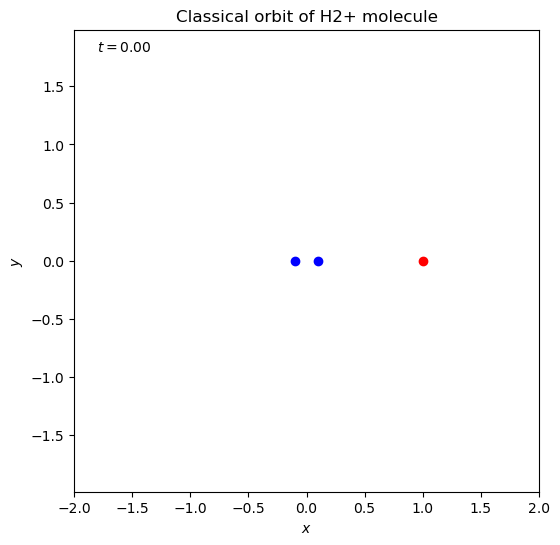

In [42]:

ani = animate(
    pos_t, mass, charge, dt, t_final, outfile=path + 'h2plus_classical_orbit.mp4',
    title='Classical orbit of H2+ molecule'
    )



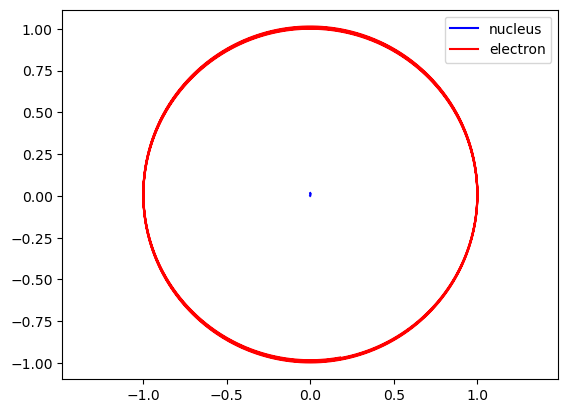

In [50]:
N = 2     # Number of particles
dim = 2   # Dimension of the system
mass = np.array([1836, 1])   # Mass of the particles
charge = np.array([1, -1])   # Charge of the particles
pos = np.array([[0, 0], [1.0, 0.0]])   # Initial position of the particles
vel = np.array([[0, 0], [0, 1.0]])     # Initial velocity of the particles
dt = 0.03    # Time step
t_final = 30  # Final time

pos_t, vel_t = integrate_leapfrog(pos, vel, mass, charge, dt, t_final)

quick_plot(pos_t, mass)


  0%|          | 0/1001 [00:00<?, ?it/s]

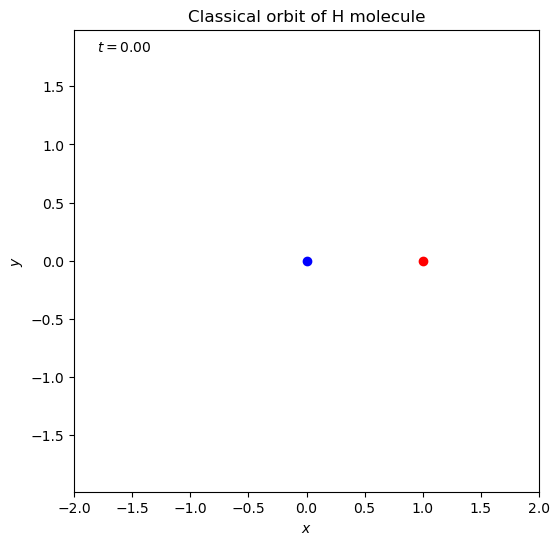

In [51]:

ani = animate(pos_t, mass, charge, dt, t_final, outfile=path  + 'h_classical_orbit.mp4', title='Classical orbit of H molecule')


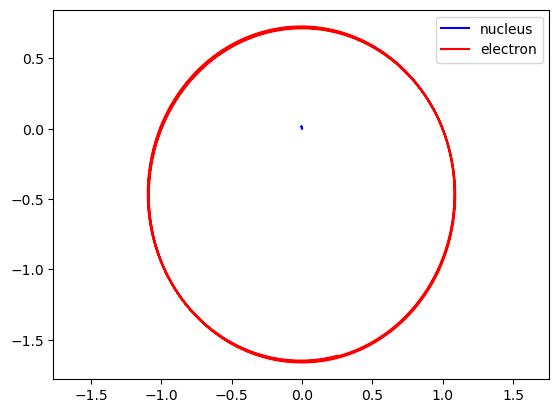

In [48]:
N = 2     # Number of particles
dim = 2   # Dimension of the system
mass = np.array([1836, 1])   # Mass of the particles
charge = np.array([1, -1])   # Charge of the particles
pos = np.array([[0, 0], [1.0, 0.0]])   # Initial position of the particles
vel = np.array([[0, 0], [-0.4, 1.0]])     # Initial velocity of the particles
dt = 0.03    # Time step
t_final = 30  # Final time

pos_t, vel_t = integrate_leapfrog(pos, vel, mass, charge, dt, t_final)

quick_plot(pos_t, mass)

  0%|          | 0/1001 [00:00<?, ?it/s]

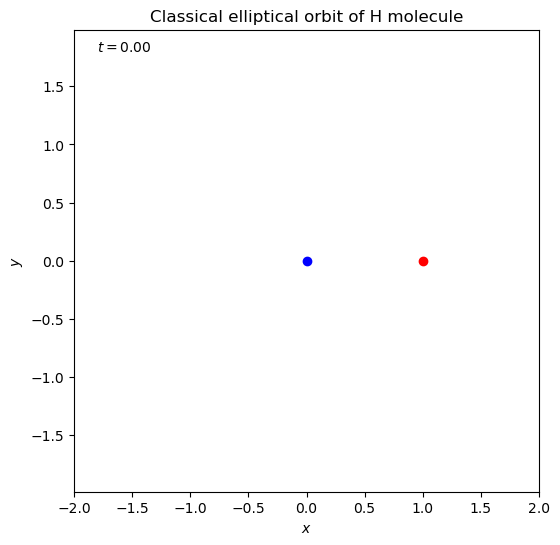

In [49]:
ani = animate(pos_t, mass, charge, dt, t_final, outfile=path  + 'h_classical_orbit_elliptic.mp4', title='Classical elliptical orbit of H molecule')
